In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
demographics = pd.read_csv('../Dataset/Demographics/demographics.csv')
sensing = pd.read_csv('../Dataset/Sensing/sensing.csv') 

In [4]:
'''
Merging sensing data with demographics data
'''
sensing['formatted_day'] = pd.to_datetime(sensing['day'].astype(str), format='%Y%m%d')
# Adds new column for day of the week
sensing['day_of_week'] = sensing['formatted_day'].dt.day_name()
sensing = sensing.merge(demographics[['uid', 'gender', 'race']], on='uid', how='left')

In [5]:
unlocks_by_day = sensing.groupby('day_of_week')['unlock_num_ep_0'].sum()
unlocks_by_day = unlocks_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Unlocks by day of week:
day_of_week
Monday       2764583
Tuesday      2751971
Wednesday    2808143
Thursday     2786099
Friday       2917805
Saturday     2813016
Sunday       2683752
Name: unlock_num_ep_0, dtype: int64


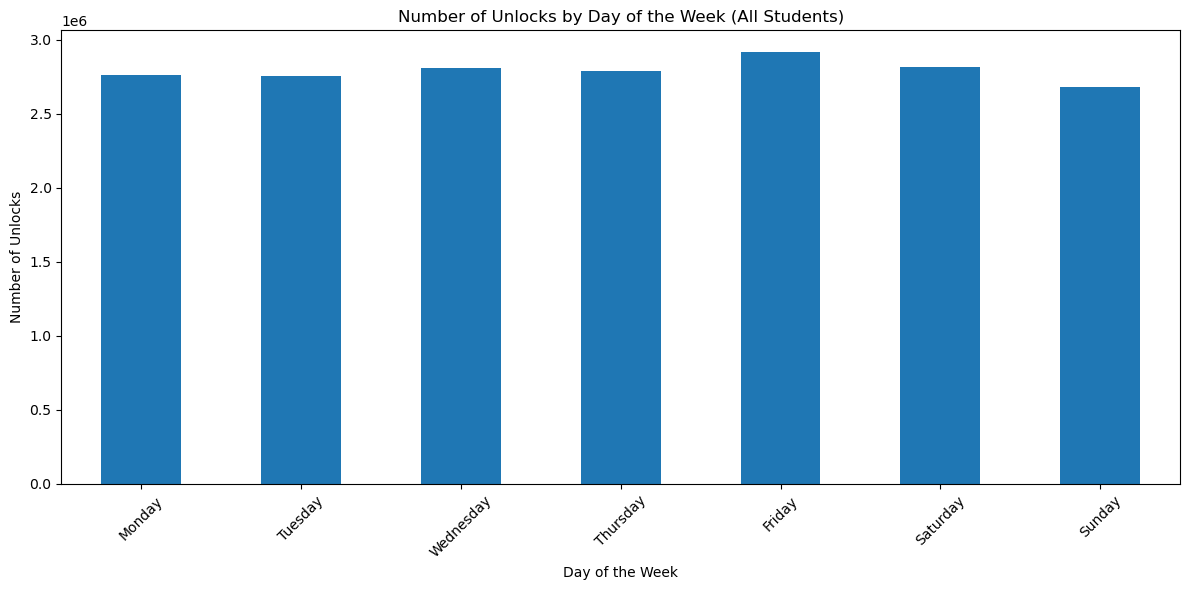

In [6]:
print("Unlocks by day of week:")
print(unlocks_by_day)

# Create a bar chart for unlocks by day of the week
plt.figure(figsize=(12, 6))
unlocks_by_day.plot(kind='bar')
plt.title('Number of Unlocks by Day of the Week (All Students)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
unlocks_by_day_gender = sensing.groupby(['day_of_week', 'gender'])['unlock_num_ep_0'].sum().unstack()
# unstack() so gender is column value (for readability)
unlocks_by_day_gender = unlocks_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_gender)

gender,F,M,both
day_of_week,,,
Monday,1862538,880067,13517
Tuesday,1857724,873000,12574
Wednesday,1891706,894300,13277
Thursday,1877533,887095,12920
Friday,1967299,928558,13235
Saturday,1905075,887335,11698
Sunday,1807823,855800,11777


<Figure size 3000x600 with 0 Axes>

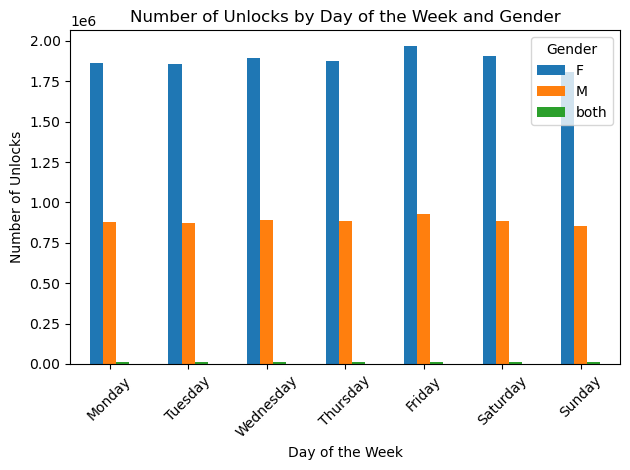

In [8]:

plt.figure(figsize=(30, 6))
unlocks_by_day_gender.plot(kind='bar')
plt.title('Number of Unlocks by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Compare unlocks by race
unlocks_by_day_race = sensing.groupby(['day_of_week', 'race'])['unlock_num_ep_0'].sum().unstack()
unlocks_by_day_race = unlocks_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_race)

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,8629,13277,13084,662489,88170,149639,87827,1733007
Tuesday,8131,13019,13465,660813,89802,151375,87870,1718823
Wednesday,8543,13093,13350,673480,90748,154566,88470,1757033
Thursday,8409,12979,13273,669545,90106,154106,87806,1741324
Friday,9425,14179,13105,705728,92820,158721,93244,1821870
Saturday,9288,12654,12109,664963,88510,159771,90182,1766631
Sunday,8574,11377,13243,634244,84063,150239,84845,1688815


<Figure size 1500x600 with 0 Axes>

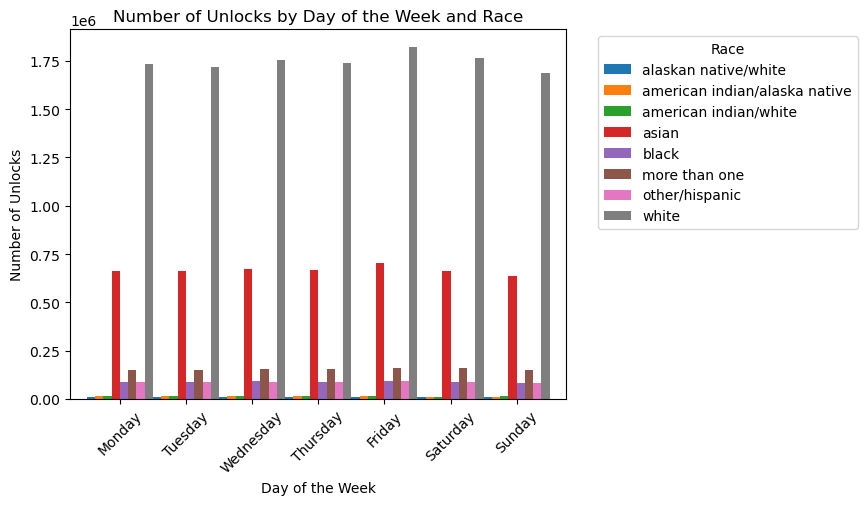

In [11]:

plt.figure(figsize=(15, 6))
unlocks_by_day_race.plot(kind='bar', width=1.0)  #
plt.title('Number of Unlocks by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()
